In [1]:
pip install pandas scikit-learn gdown xgboost catboost 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp.csv', delimiter=";")
datasdp.head()

,index,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,1,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,2,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,3,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,4,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,5,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [8]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
base_models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]

In [9]:
base_model_preds = []
for model in base_models:
    model.fit(X_train_base, y_train_base)
    pred = model.predict(X_train_meta)
    base_model_preds.append(pred)

stacking_dataset = np.column_stack(base_model_preds)
meta_model = LogisticRegression()
meta_model.fit(stacking_dataset, y_train_meta)

Learning rate set to 0.017737
0:	learn: 0.6710918	total: 3.36s	remaining: 55m 59s
1:	learn: 0.6496616	total: 3.41s	remaining: 28m 21s
2:	learn: 0.6301436	total: 3.44s	remaining: 19m 4s
3:	learn: 0.6098166	total: 3.51s	remaining: 14m 34s
4:	learn: 0.5920280	total: 3.57s	remaining: 11m 51s
5:	learn: 0.5743081	total: 3.8s	remaining: 10m 28s
6:	learn: 0.5579702	total: 3.86s	remaining: 9m 7s
7:	learn: 0.5421980	total: 4.11s	remaining: 8m 30s
8:	learn: 0.5275596	total: 4.24s	remaining: 7m 46s
9:	learn: 0.5133799	total: 4.29s	remaining: 7m 5s
10:	learn: 0.4988228	total: 4.55s	remaining: 6m 49s
11:	learn: 0.4867121	total: 4.67s	remaining: 6m 24s
12:	learn: 0.4745309	total: 4.73s	remaining: 5m 59s
13:	learn: 0.4626294	total: 4.81s	remaining: 5m 39s
14:	learn: 0.4515644	total: 4.87s	remaining: 5m 19s
15:	learn: 0.4412476	total: 4.95s	remaining: 5m 4s
16:	learn: 0.4300611	total: 4.99s	remaining: 4m 48s
17:	learn: 0.4204700	total: 5.06s	remaining: 4m 36s
18:	learn: 0.4115770	total: 5.14s	remaining

LogisticRegression()

In [10]:
#implementing stacking from previous meta model dataset
holdout_preds = []
for model in base_models:
    pred = model.predict(X_holdout)
    holdout_preds.append(pred)

stacking_holdout_dataset = np.column_stack(holdout_preds)
meta_model_holdout_preds = meta_model.predict(stacking_holdout_dataset)

Accuracy: 92.66%
Precision: 41.67%
Recall: 3.88%
F1score: 7.09%
Roc_auc: 51.73%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1656
           1       0.42      0.04      0.07       129

    accuracy                           0.93      1785
   macro avg       0.67      0.52      0.52      1785
weighted avg       0.89      0.93      0.90      1785



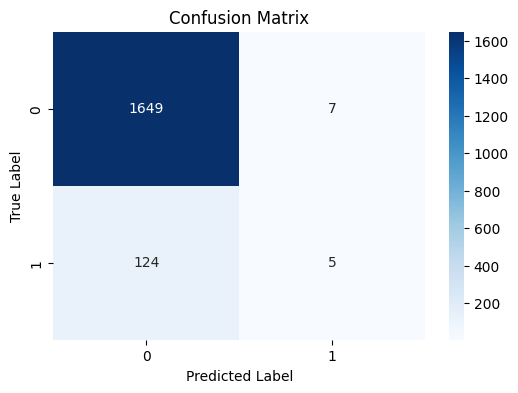

In [11]:
#evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report

accuracy = accuracy_score(y_holdout, meta_model_holdout_preds)
precision = precision_score(y_holdout, meta_model_holdout_preds)
recall = recall_score(y_holdout, meta_model_holdout_preds)
f1score = f1_score(y_holdout, meta_model_holdout_preds)
roc_auc = roc_auc_score(y_holdout, meta_model_holdout_preds)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1score: {f1score*100:.2f}%')
print(f'Roc_auc: {roc_auc*100:.2f}%')
print(classification_report(y_holdout, meta_model_holdout_preds))

# Compute confusion matrix
cm = confusion_matrix(y_holdout, meta_model_holdout_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()